# Code Agent

整体Agent流程

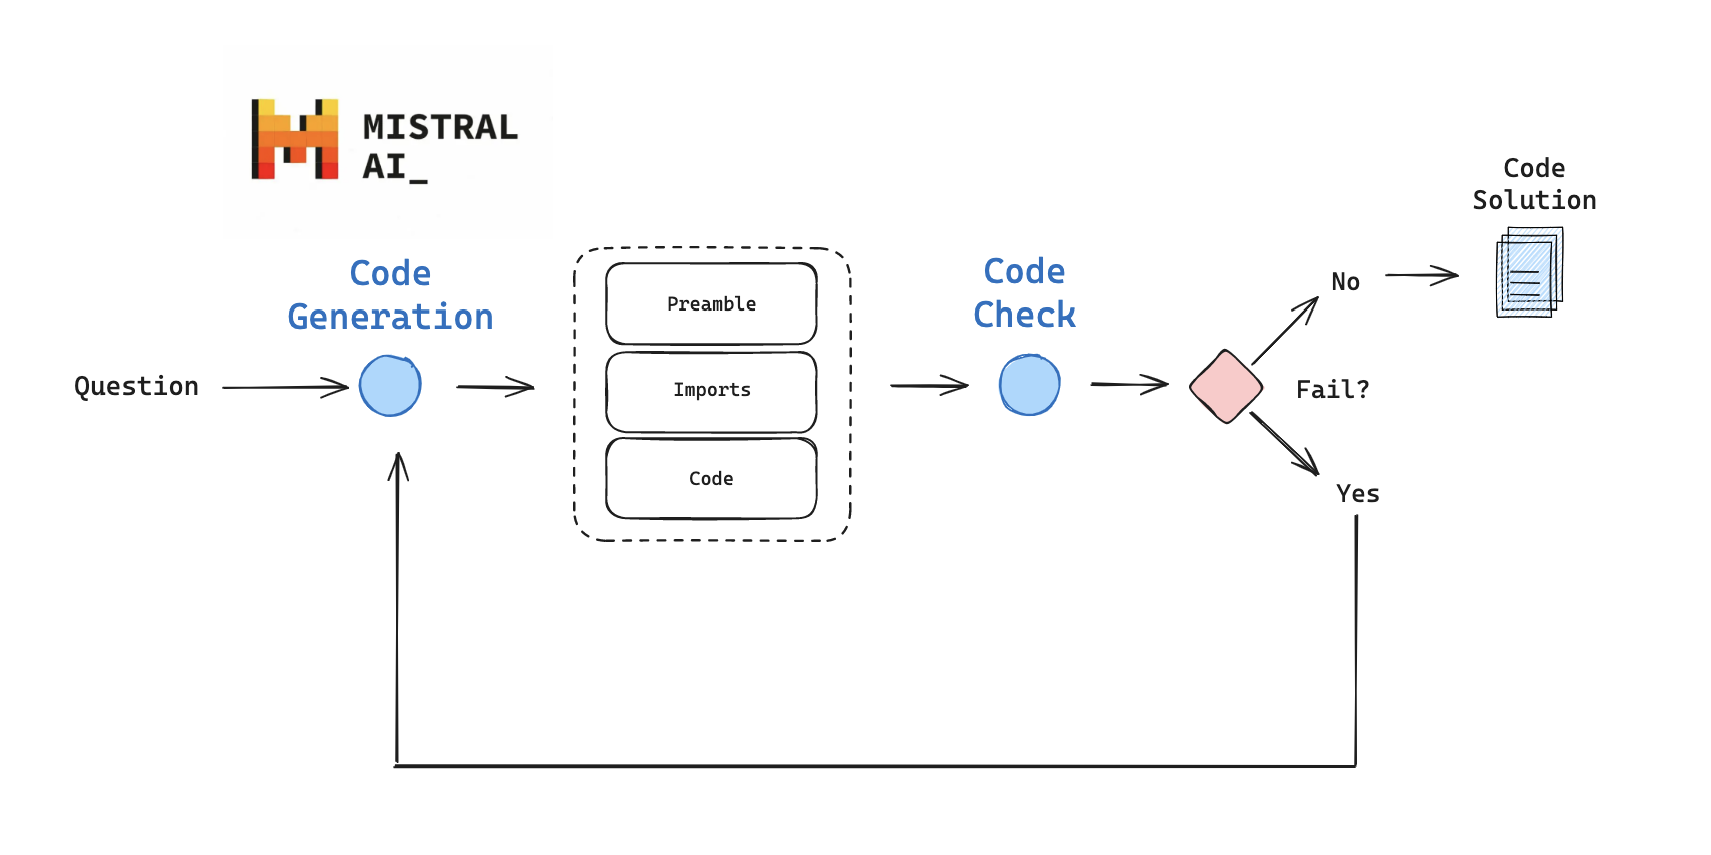

In [1]:
! pip install -U langchain_community langchain-mistralai langchain langgraph

  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 308.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 252.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 437.6 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 236.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: langgraph━━━━━╸━━━━━━━━━ 17/22 [dataclasses-json]
    Found existing installation: langgraph 0.6.4━━━━━━━━━ 17/22 [dataclasses-json]
    Uninstalling langgraph-0.6.4:━╸━━━━━━━━━ 17/22 [dataclasses-json]
      Successfully uninstalled langgraph-0.6.40m━━━━━━━━━ 17/22 [dataclasses-json]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22/22 [langchain_community]ngchain_community]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## 创建code 大模型

In [ ]:
# Select LLM
from langchain_mistralai import ChatMistralAI
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

# Mistral model
mistral_model = "codestral-latest"
llm = ChatMistralAI(model=mistral_model, temperature=0)

# Prompt 
code_gen_prompt_claude = ChatPromptTemplate.from_messages(
    [
        (
            "system", 
            """You are a coding assistant. Ensure any code you provide can be executed with all required imports and variables \n
            defined. Structure your answer: 1) a prefix describing the code solution, 2) the imports, 3) the functioning code block.
            \n Here is the user question:""",
        ),
        ("placeholder", "{messages}"),
    ]
)

# Data model
class code(BaseModel):
    """Schema for code solutions to questions about LCEL."""

    prefix: str = Field(description="Description of the problem and approach")
    imports: str = Field(description="Code block import statements")
    code: str = Field(description="Code block not including import statements")

# LLM
code_gen_chain = llm.with_structured_output(code, include_raw=False)